# Social Media Sentiment Analysis


TEAM MEMBERS:

Urmi Kanrar - MSA25003

Samayita Mohanta - MSD25004

Lipika Maji - MSD25011

PROJECT OBJECTIVES:

Our main objective is to analyze user-generated tweets and comments and thereby categorize it into Positive, Negative, Neutral, or Irrelevant sentiments. We aim to develop a high accuracy and reliable sentiment prediction model which can be used for real time tweet monitoring. Here, the user can input a tweet and instantly receive its sentiment.


DATASET:

We have used a Kaggle dataset containing text comments along with their corresponding sentiment labels. There are 4 cloumns in the datset namely:

id - Tweet ID

game - indicates the game the tweet is associated with

response - denotes the sentiment category associated with the comment

comments - contains the tweets or text messages which are to be classified

Kaggle dataset link: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

MACHINE LEARNING TECNIQUES AND PROJECT APPROACH:

1. Data Cleaning and Exploratory Data Analysis


*   Imported the dataset (twittertraining.xlsx), which contains raw tweets and their corresponding sentiment labels.
*   Converting the tweets to Lowercase
*   Cleaning the tweets by removing URLs, punctuations, special characters , extra spaces.
*   Tweet length analysis using Boxplot
*   Top 20 games by Tweet Count
*   Sentiment class distribution
*   Visualisation for each sentiment using WordCloud


2. Dataset Splitting and Feature Extraction
*   Splitting the dataset into train and test data
*   Converting the cleaned text into numerical features using TF-IDF

3. Model Training
*   Classifcation models used - Decision Tree, Logistic Regression, Naive Bayes, Linear Support Vector Machine (SVM), Random Forest
*  For further improvement ensemble learning used - XGBoost , Stacking
*   k-fold cross validation used to check for overfitting

4. Saving the model and Prediction Interface
*   We save the model using joblib
*   The saved model is then used for user input based sentiment prediction.








  




In [ ]:
df.isna().sum()

,0
id,0
game,0
response,0
comment,686


import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path ='twittertraining.xlsx'
df = pd.read_excel(file_path)
df.head()

In [ ]:
df.duplicated().sum()

np.int64(2701)

In [ ]:
# Cleaning
df = df.drop_duplicates()
df = df.dropna(subset=['comment','response'])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_comment'] = df['comment'].apply(clean_text)
df.head()

,id,game,response,comment,clean_comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


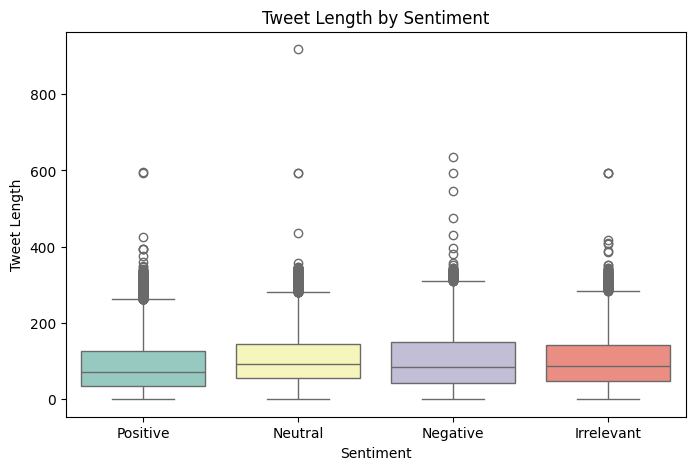

In [ ]:
# Tweet length analysis
import matplotlib.pyplot as plt
import seaborn as sns
df['text_length'] = df['clean_comment'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='response', y='text_length', palette='Set3', hue='response', legend=False)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

Observations from Boxplot:



1.   The tweet length distribution is similar which implies that people tend to write roughly similar tweet lengths irrespective of the sentiment. However, negative tweets exhibit a slightly wider spread. This might indicate that the users tend to write longer messages for expressing negative emotions.
2.   Median length is very similar varying approximately around 80-100 characters.
3. Variability is consistent since all the categories have similar inter quartile range.
4. All the categories contain outliers which indicates no single class is disproportionately affected.
5. In sentiment classifcation, the natural variabiltity of the dataset is preserved by retaining outliers. Thus, outlier removal is not required in this case.





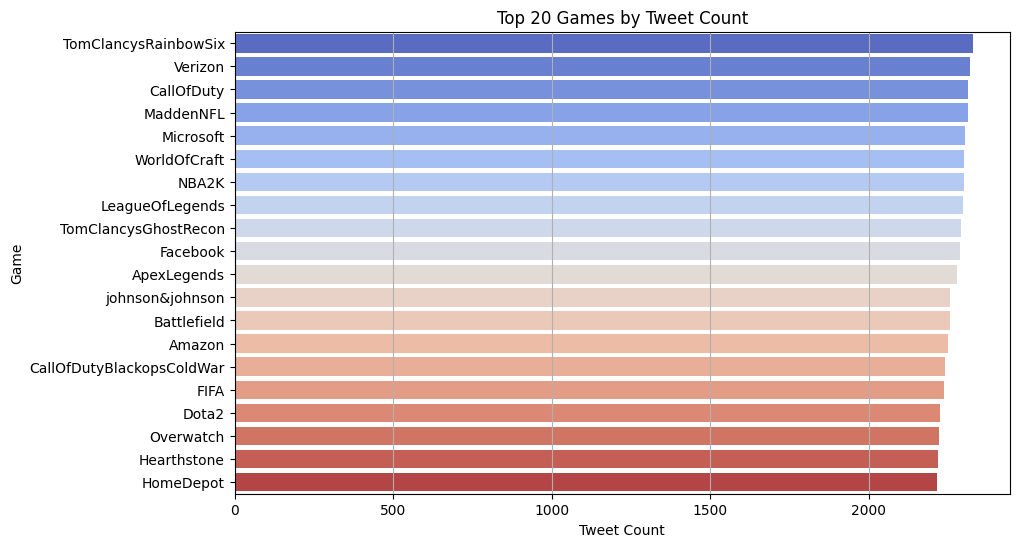

In [ ]:
# Entity distribution (top 20 entities)
plt.figure(figsize=(10, 6))
top_entities = df['game'].value_counts().nlargest(20)
sns.barplot(x=top_entities.values, y=top_entities.index, palette='coolwarm', hue=top_entities.index, legend=False)
plt.title('Top 20 Games by Tweet Count')
plt.xlabel('Tweet Count')
plt.ylabel('Game')
plt.grid(axis='x')
plt.show()

Observations regarding entity distribution:

1. The top segment of the chart is dominated by well-known gaming franchises such as CallOfDuty, MaddenNFL, NBA2K, WorldOfCraft, and LeagueOfLegends, reflecting their large and active online communities.
2. Non-game entities such as Verizon, Microsoft, Facebook, Amazon, and HomeDepot appear among the top 20.
This suggests that the keyword extraction process may have captured brands loosely associated with gaming conversations, or
o	these entities were referenced in contexts involving gaming hardware, promotions, or sponsorships.



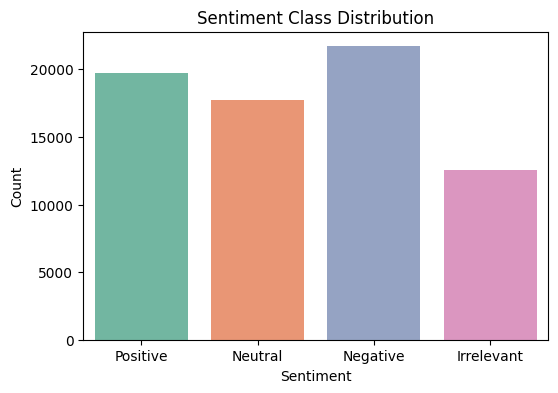

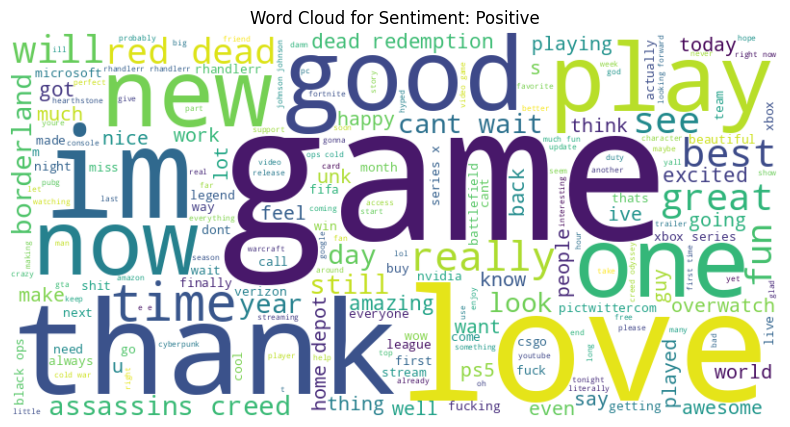

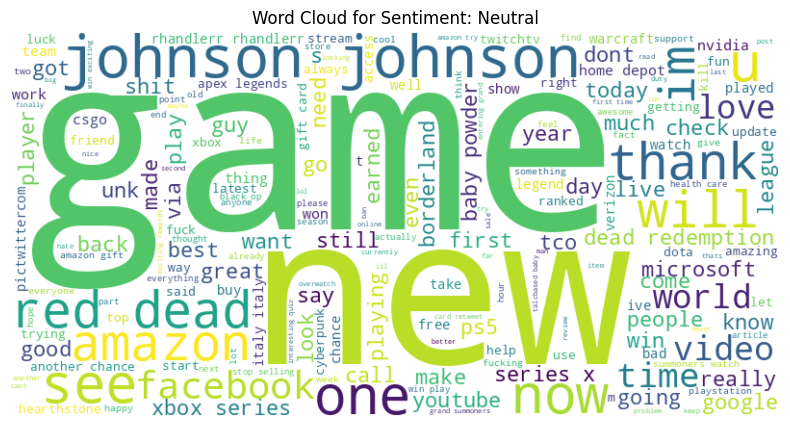

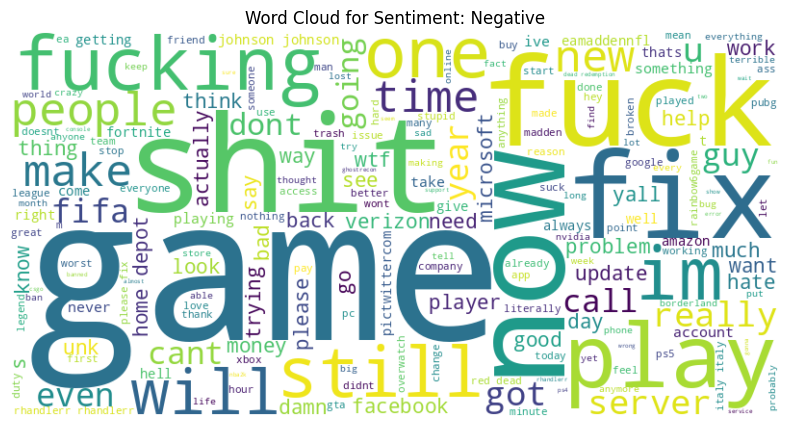

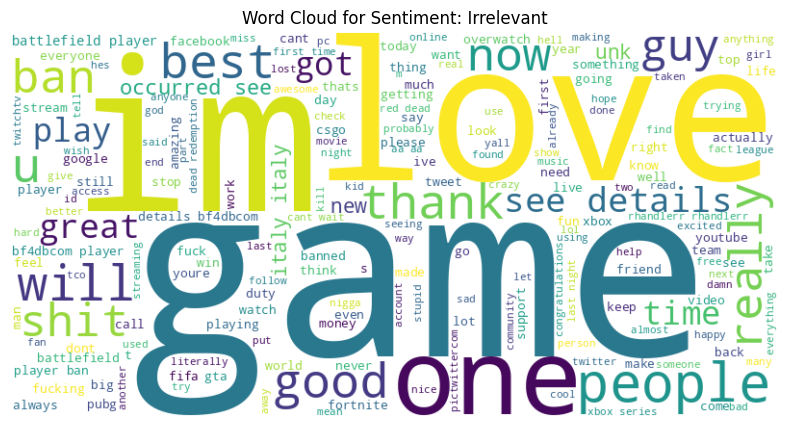

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='response', hue='response', palette='Set2', legend=False)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# WordCloud for each sentiment
for sentiment_label in df['response'].unique():
    text = " ".join(df[df['response'] == sentiment_label]['clean_comment'])
    if text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Sentiment: {sentiment_label}')
        plt.show()

Observations on Sentiment Class Distribution:
1. The dataset is not perfectly balanced. The Negative class has the highest number of samples, followed by Positive and Neutral.

2. The Irrelevant class has noticeably fewer samples compared to the other categories.



Observations on WordCloud Visualisation:
1. It provides us with a clear visual summary of the most frequent words in the dataset, thus helping us to identify dominant themes quickly.
2. Words like game, love, good, play, thank, new appear most frequently. The language mainly reflects excitement, appreciation, and enjoyment.
3. Similarly, the neutral word cloud contains generic terms like game, new, thank, video, amazon. Such words are informational likely people sharing updates, talking about releases, or mentioning products.
4. Many tweets mention issues like servers, money, updates and problems, showing frustration and dissatisfaction. Compared to other categories, the tone here is clearly more intense and complaint-driven.
5. The irrelevant category contains mixed terms which do not point clearly to any emotion. Words like game, one, me, love, best appear often but in contexts not related to sentiment classification.

In [ ]:
# Split
X = df['clean_comment']
y = df['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,   # unrestricted = MOST LIKELY to overfit
    random_state=42
)

dt_model.fit(X_train_tfidf, y_train)

# ---------------------------
# Predict on TRAINING DATA
# ---------------------------
y_train_pred = dt_model.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_train_pred)

# ---------------------------
# Predict on TESTING DATA
# ---------------------------
y_test_pred = dt_model.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n-------------------------------")
print("       DECISION TREE MODEL     ")
print("-------------------------------\n")
print(f"Training Accuracy: {train_acc}")
print(f"Testing  Accuracy: {test_acc}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))





-------------------------------
       DECISION TREE MODEL     
-------------------------------

Training Accuracy: 0.9719838113181215
Testing  Accuracy: 0.7212336892052195

Classification Report (Test Set):
              precision    recall  f1-score   support

  Irrelevant       0.69      0.64      0.66      2505
    Negative       0.77      0.76      0.76      4405
     Neutral       0.69      0.71      0.70      3541
    Positive       0.72      0.74      0.73      3880

    accuracy                           0.72     14331
   macro avg       0.72      0.71      0.71     14331
weighted avg       0.72      0.72      0.72     14331



Limations and Challenges faced in Decision Tree
1. The training accuracy is very high (≈ 97%) whereas the testing accuracy is around 72%. It means that the model memorises the training data instead of learning general patterns. Hence, this implies overfitting.
2. Since TF-IDF creates thousands of features, the decision tree does not perform well in this high dimensional environment because it ends up creating complex splits.
3. Decision Tree tends to favour majority classes. As a result, the precision and recall of the irrelevant class (due to fewer samples) is lower as compared to the other classes.

Hence, Decision Tree is not a good model for NLP tasks.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    pred_test = model.predict(X_test_tfidf)
    pred_train = model.predict(X_train_tfidf)
    acc = accuracy_score(y_test, pred_test)
    train_acc = accuracy_score(y_train, pred_train)

    print("\n--------------------------------")
    print(f"MODEL: {name}")
    print("--------------------------------------------")
    print("Test Accuracy:", acc)
    print("Train Accuracy:", train_acc)
    print(classification_report(y_test, pred_test))

    results.append([name, acc])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df


--------------------------------
MODEL: Logistic Regression
--------------------------------------------
Test Accuracy: 0.6829251273463122
Train Accuracy: 0.7393587328169702
              precision    recall  f1-score   support

  Irrelevant       0.66      0.51      0.57      2505
    Negative       0.72      0.79      0.75      4405
     Neutral       0.65      0.64      0.64      3541
    Positive       0.68      0.72      0.70      3880

    accuracy                           0.68     14331
   macro avg       0.68      0.66      0.67     14331
weighted avg       0.68      0.68      0.68     14331


--------------------------------
MODEL: Naive Bayes
--------------------------------------------
Test Accuracy: 0.6298234596329635
Train Accuracy: 0.6694229293140744
              precision    recall  f1-score   support

  Irrelevant       0.74      0.32      0.44      2505
    Negative       0.62      0.81      0.70      4405
     Neutral       0.66      0.52      0.58      3541
    Po

,Model,Accuracy
0,Logistic Regression,0.682925
1,Naive Bayes,0.629823
2,Linear SVM,0.699812
3,Random Forest,0.881446


Challenges and Limitations in each of the classification models:

1. Logistic regression
*   It can be observed that the model performs moderately well and is balanced across the classes.
*   It shows relatively low recall for the irrelevant class which implies that it missed many examples from that category.
*   Since it assumes linear decision boundaries, it may not fully capture the variations in the sentiment text.

2. Naive Bayes
*   This is the poorest performer having overall accuracy 63% .
*   It is built on the assumption that the words are independent but it rarely occurs in real world text data.

3. Linear SVM
*   We observe that Linear SVM seems to have performed better that LR and NB (≈70% accuracy). However, it still could not capture all the sentiment patterns in the text.
*   We note that sometimes the classes share similar words. In such cases there is often a chance of misclassification because linear boundary cannot cleanly seperate them.
*   Also due to overlapping vocabulary, the model seems to have struggled in distinguishing irrelevant tweets from the negative or neutral ones.

4. Random Forest
*   Although it shows the highest performance (≈88% accuracy), it clearly overfits because the training accuracy is around 97%.
*   Due to sparsity of TF-IDF features, it tends to build complex and deep trees that generalise poorly.












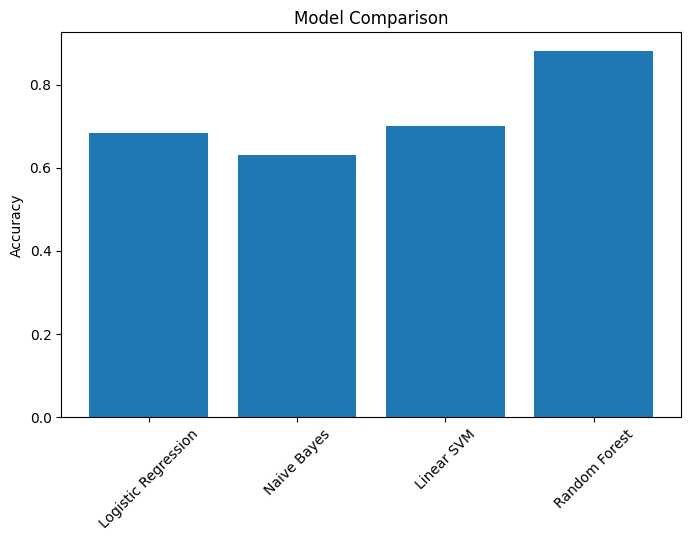

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

Improvement: Here, either the model overfits or purely relies on bag-of-words features, ignoring contextual meaning and sarcasm. Hence, we move forward towards ensemble learning models namely XGBoost and Stacking.

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

xgb.fit(X_train_tfidf, y_train_encoded)
y_pred_encoded = xgb.predict(X_test_tfidf)

# Decode predictions back to original labels for evaluation
y_pred = le.inverse_transform(y_pred_encoded)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6557811736794362
              precision    recall  f1-score   support

  Irrelevant       0.75      0.38      0.51      2505
    Negative       0.65      0.79      0.72      4405
     Neutral       0.62      0.62      0.62      3541
    Positive       0.66      0.71      0.68      3880

    accuracy                           0.66     14331
   macro avg       0.67      0.63      0.63     14331
weighted avg       0.66      0.66      0.65     14331



Limitations in the XGBoost model
1. Here, overall accuracy is around 66% and it is not strong enough to classify all categories reliably.
2. We observe class overlapping, often labels irrelevant as some other category.
3. The model is biased towards recognising negative tweets more accurately.

# Stacking:
Unlike single model approaches, stacking integrates diverse learning algorithms like Logistic Regression, Naive Bayes and Linear SVM. This ensembles multiple perspectives of the data and combines the individual strength of each model.

The meta learner - Logistic Regression further refines the final decision. So, here stacking is particularly suitable for this high dimensional, noisy tweets.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# Prepare data
X = df['clean_comment']
y = df['response']

# Hold-out split for final evaluation
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build pipelines so vectorizer is fit inside CV folds
pipe_nb = make_pipeline(TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english'),
                        MultinomialNB())

# For SVM we calibrate to get probabilities
pipe_svc = make_pipeline(TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english'),
                         CalibratedClassifierCV(LinearSVC(max_iter=5000), cv=3))

pipe_lr = make_pipeline(TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english'),
                        LogisticRegression(max_iter=2000, solver='saga', multi_class='multinomial'))

# StackingClassifier expects estimators that work with raw X (so use pipelines)
estimators = [
    ('nb', pipe_nb),
    ('svc', pipe_svc),
    ('lr', pipe_lr)
]

# Meta-learner (simple and interpretable)
final_estimator = LogisticRegression(max_iter=2000, solver='saga', multi_class='multinomial')

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=1,
    passthrough=False
)

# Fit stacking on training text (pipelines fit TF-IDF inside)
print("Training stacking classifier (this may take a while)...")
stack.fit(X_train_text, y_train)

# Evaluate on hold-out test
y_pred = stack.predict(X_test_text)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training stacking classifier (this may take a while)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Test accuracy: 0.8224129509455027
              precision    recall  f1-score   support

  Irrelevant       0.83      0.76      0.80      2507
    Negative       0.85      0.85      0.85      4340
     Neutral       0.83      0.79      0.81      3541
    Positive       0.78      0.86      0.81      3943

    accuracy                           0.82     14331
   macro avg       0.82      0.82      0.82     14331
weighted avg       0.82      0.82      0.82     14331



Observations based on the classification report on Stacking
1. It can be well observed that the overall test accuracy is 82% which is better than the performance of the individual models we previously used.
2. It reduced the chances of misclassification between subtle categories like irrelevant and neutral classes.
3. We note that the macro and weighted averages are both at 0.82. This implies that stacking is not overly biased towards majority classes.

Hence, we see that we have overcome most of the challenges that we faced during use of individual classification models. However, we also need to check for overfitting in this model which has been done by the k-fold cross validation method.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stack, X_train_text, y_train, cv=skf, scoring='accuracy')

print("Stacking CV mean:", cv_scores.mean())
print("Stacking CV std:", cv_scores.std())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Stacking CV mean: 0.8021596402656345
Stacking CV std: 0.0015199301842172199


Observations based on k-fold cross vaildation:
1. We note that the Stacking CV mean and testing accuracy is very close to each other. This indicates that the model is neither overfitting nor underfitting.
2. Small sd value indicates that it is a stable model and generalises well.
Hence, this stacking model can be considered good enough for our final prediction.

In [ ]:
import joblib
joblib.dump(stack,"Stacking_model.joblib")

['Stacking_model.joblib']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

joblib.dump(stack, "/content/drive/MyDrive/Stacking_model.joblib")


Mounted at /content/drive


['/content/drive/MyDrive/Stacking_model.joblib']

In [ ]:
stack = joblib.load("/content/drive/MyDrive/Stacking_model.joblib")

# --- use the same clean_text function you used in training ---
def clean_text(text):
    import re
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# --- prediction function ---
def predict_sentiment(input_text):
    cleaned = clean_text(input_text)

    pred_label = stack.predict([cleaned])[0]      # predict label with raw text

    # Get probabilities if available
    try:
        probs = stack.predict_proba([cleaned])[0]
        prob_map = dict(zip(stack.classes_, probs))
    except:
        prob_map = {pred_label: 1.0}

    print("Input Text       :", input_text)
    print("Cleaned Text     :", cleaned)
    print("Predicted Label  :", pred_label)
    print("Probabilities    :", prob_map)

# --- ask user for input ---
tweet = input("Enter a tweet: ")
predict_sentiment(tweet)


Enter a tweet: I Absolutely love this game!! The new features makes the gameplay enjoyable and better...
Input Text       : I Absolutely love this game!! The new features makes the gameplay enjoyable and better...
Cleaned Text     : i absolutely love this game the new features makes the gameplay enjoyable and better
Predicted Label  : Positive
Probabilities    : {'Irrelevant': np.float64(0.028217055202490154), 'Negative': np.float64(0.017332891194738426), 'Neutral': np.float64(0.0796323209131994), 'Positive': np.float64(0.8748177326895721)}


# Future Enhancements
The stacking ensemble demonstrates generalisation and provides us with stable predictions. Though it is promising, however further advanced transformer-based models could be adopted for enhancement, and the dataset needs to be increased and balanced. Also, the steps of preprocessing need more refinement, and the model could be deployed as an interactive application for real world use.

Looking ahead, the system can be further strengthened by incorporating deep learning methods, particularly transformer-based models like BERT or DistilBERT, which capture contextual meaning and subtle linguistic cues far better than TF-IDF features. Alongside enhancements in preprocessing, data expansion, and model optimisation, these deep learning approaches offer a promising path toward building a more accurate, context-aware, and scalable sentiment analysis system suitable for real-world applications.